___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [165]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

In [176]:
dado = pd.Series(randint(1,7, size=10))

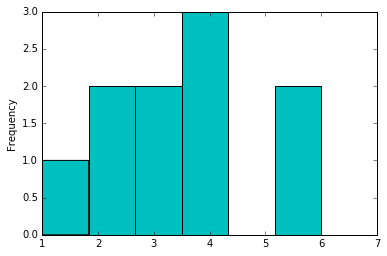

In [177]:
dado.plot.hist(bins = 6, color='c')

In [178]:
dado2 = pd.Series(randint(1,7, size=100))

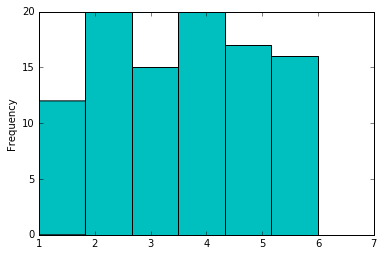

In [179]:
dado2.plot.hist(bins = 6, color='c')

In [180]:
dado3 = pd.Series(randint(1,7, size=10000))

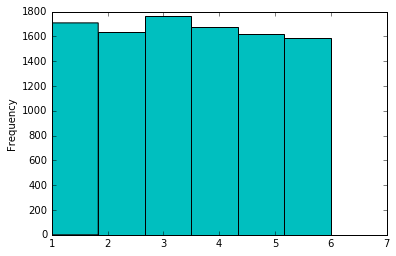

In [181]:
dado3.plot.hist(bins = 6, color='c')

## Resposta

b) A probabilidade não é igual à teórica, porque na teoria são feitos infinitos lançamentos do dado.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [172]:
soma = 0
sete = 0
vezes = 0

while vezes <= 1000:
      
    jogada1 = np.random.randint(1,7)
    jogada2 = np.random.randint(1,7)
    
    soma = jogada1+jogada2
    
    if jogada1 + jogada2 == 7:
        sete+=1
        
    vezes += 1
    
print(sete)

probabilidade = sete/1000

print("A probabilidade de a soma ser sete é: ")
print(probabilidade)

168
A probabilidade de a soma ser sete é: 
0.168


In [173]:
sete = 0
vezes = 0

while vezes <= 1000:
      
    jogada1 = np.random.randint(1,7)
    
    soma = jogada1
    
    jogada2 = np.random.randint(1,7)
    
    soma += jogada2
    
    if jogada1 + jogada2 == 7:
        sete+=1
        
    vezes += 1
    
print(sete)

probabilidade = sete/1000

print("A probabilidade de a soma ser sete é: ")
print(probabilidade)   

163
A probabilidade de a soma ser sete é: 
0.163


## Observação

No exercício a), a probabilidade de a soma ser igual a 7 varia, visto que são lançamentos completamente aleatórios.

Comparando o a) com o b), a probabilidade não muda, pois ambos são eventos totalmente aleátorios.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [175]:
ganhou = 0

perdeu = 0

premiada = np.random.randint(1,4)

escolhida = np.random.randint(1,4)

aberta = np.random.randint(1,4)

vezes = 0

while vezes <= 10000:
    while True:
        if aberta == premiada or aberta == escolhida:
            aberta = np.random.randint(1,4)
        else:
            break
    vezes += 1
    
    nova_escolha = np.random.randint(1,4)
    if nova_escolha == premiada:
        ganhou += 1
    else:
        perdeu += 1
        
print("Vezes que ganhou ao trocar de porta: ")
print(ganhou)

print("Vezes que perdeu trocando de porta: ")
print(perdeu)




Vezes que ganhou ao trocar de porta: 
3365
Vezes que perdeu trocando de porta: 
6636
